# **SIN 393 – Introduction to Computer Vision (2023-2)**

# Lecture 01 - Part 1 - Digital imagens

Prof. João Fernando Mari ([*joaofmari.github.io*](https://joaofmari.github.io/))

---

## Importing the required libraries
---

In [1]:
# Python Standard Library
import os

# External libraries
import numpy as np
from skimage import data, color, util, io, transform
from PIL import Image
import matplotlib.pyplot as plt

### %matplotlib notebook
%matplotlib widget

In [2]:
!python --version

Python 3.9.17


## Loading an image
---
* Loading a gray-level image directly from the scikit-image library.

In [3]:
img = data.coins()

# Printing (a part of) the image, for analysis.
print(img)

[[ 47 123 133 ...  14   3  12]
 [ 93 144 145 ...  12   7   7]
 [126 147 143 ...   2  13   3]
 ...
 [ 81  79  74 ...   6   4   7]
 [ 88  82  74 ...   5   7   8]
 [ 91  79  68 ...   4  10   7]]


## Plotting the image
---

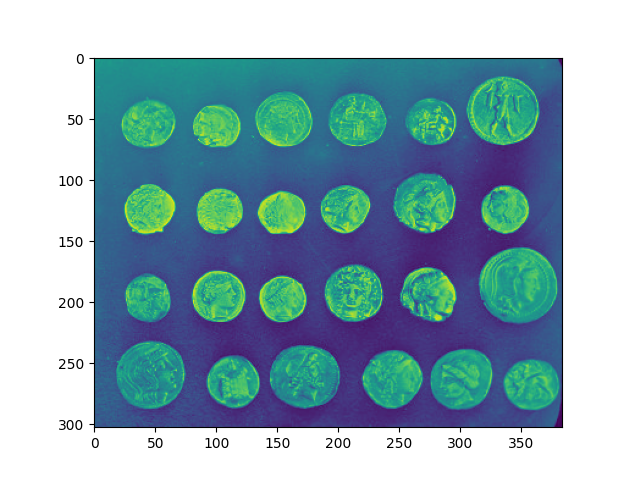

In [4]:
plt.figure()

plt.imshow(img)

plt.show()

* When plotting an image in grayscale using Matplotlib, the image is displayed using a colormap (pseudocolors).
     * That is, each gray level is mapped to a false color.
* For Matplotlib to show gray levels, explicitly setting the 'gray' colormap is necessary.

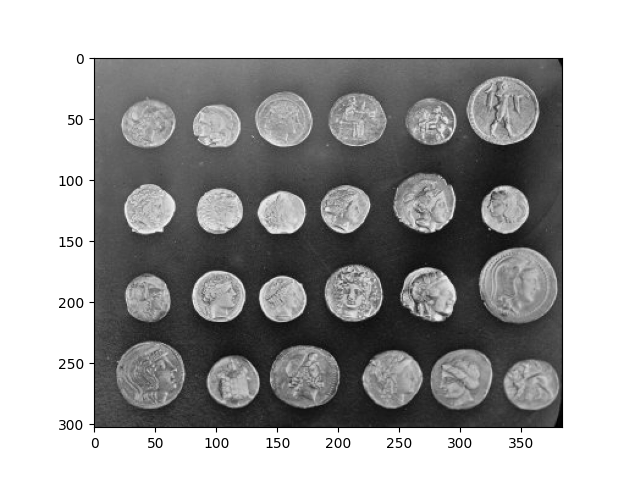

In [5]:
plt.figure()

# To visualize an intensity image in gray levels, use the 'gray' colormap.
plt.imshow(img, cmap='gray')

plt.show()

## Information about the image
---

* We can obtain some important information about the images.

In [6]:
# The type of the variable that stores the image.
print(type(img))

<class 'numpy.ndarray'>


In [7]:
print(f'Shape of the image: {img.shape}')
print(f'Number of dimensions: {img.ndim}')
print(f'Data type: {img.dtype}')
print()
print(f'Minimum value: {img.min()}')
print(f'Maximum value: {img.max()}')
print(f'Image mean: {img.mean():.4f}')
print(f'Image standard deviation: {img.std():.4f}')

Shape of the image: (303, 384)
Number of dimensions: 2
Data type: uint8

Minimum value: 1
Maximum value: 252
Image mean: 96.8555
Image standard deviation: 52.8798


## Image histogram
---
* An image's histogram consists of counting the occurrences of the intensity values in the image.
* The histogram is usually visualized using a bar graph (or similar)
         The number of bars is the number of possible intensity values (image depth)
         The size of each bar corresponds to the number of occurrences of the value in the image.

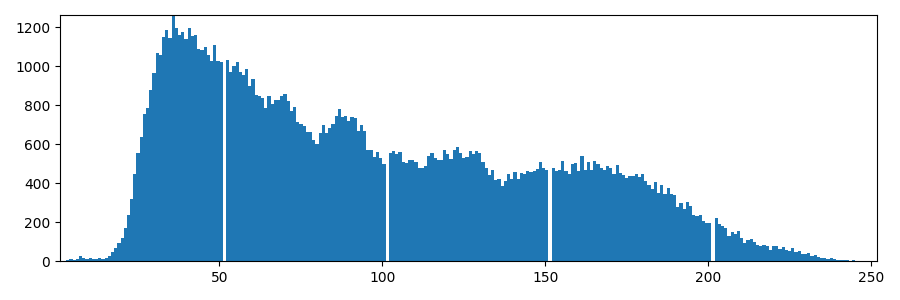

In [8]:
plt.figure(figsize=(9, 3))

# The 'ravel' method converts any ndarray into a 1D ndarray.
# The number of bins is set to 256 because the image data type is uint8 (unsigned 8-bit integer).
plt.hist(img.ravel(), bins=256)
plt.autoscale(enable=True, axis='both', tight=True)

plt.tight_layout()
plt.show()

## Loading an RGB image
---
* Loading a color (RGB) image directly from the scikit-image library.

In [9]:
img_rgb = data.astronaut()

* Plotting the image

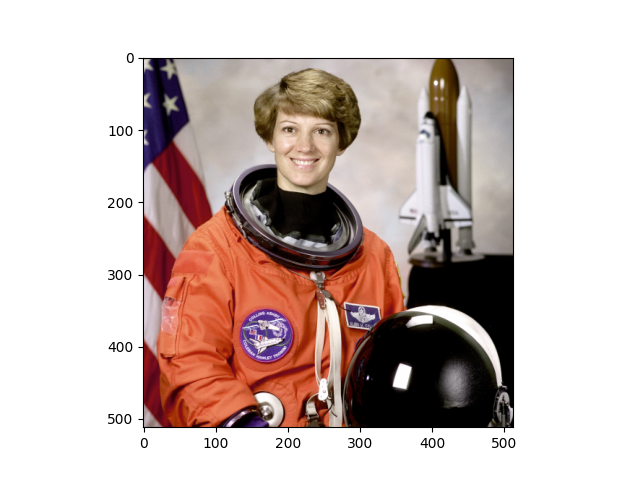

In [10]:
plt.figure()

plt.imshow(img_rgb)

plt.show()

### Informations about the image
* Let's create a function to print information about the image.

In [11]:
def print_info(img):
    print(f'Shape of the image: {img.shape}')
    print(f'Number of dimensions: {img.ndim}')
    print(f'Data type: {img.dtype}')
    print()
    print(f'Minimum value: {img.min()}')
    print(f'Maximum value: {img.max()}')
    print(f'Image mean: {img.mean():.4f}')
    print(f'Image standard deviation: {img.std():.4f}')

* Now you don't have to repeat the code again
    * We just call the function passing the variable that stores the image as an argument.

In [12]:
print_info(img_rgb)

Shape of the image: (512, 512, 3)
Number of dimensions: 3
Data type: uint8

Minimum value: 0
Maximum value: 255
Image mean: 114.5990
Image standard deviation: 81.2304


* An RGB color image is composed of 3 channels. Each channel stores information about one color: Red, Green, and Blue.

In [13]:
# Red channel
im_r = img_rgb[:,:,0]
# Green channel
im_g = img_rgb[:,:,1]
# Blue channel
im_b = img_rgb[:,:,2]

* Using Matplotlib, it is possible to show multiple plots in the same figure.

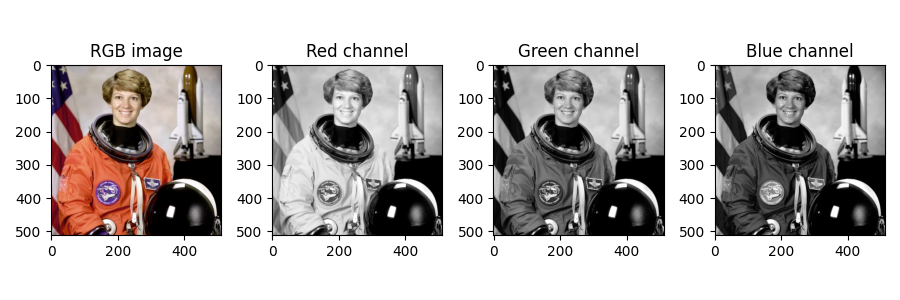

In [14]:
plt.figure(figsize=(9, 3))

plt.subplot(1,4,1)
plt.imshow(img_rgb, cmap='gray')
plt.title('RGB image')
plt.subplot(1,4,2)
plt.imshow(im_r, cmap='gray')
plt.title('Red channel')
plt.subplot(1,4,3)
plt.imshow(im_g, cmap='gray')
plt.title('Green channel')
plt.subplot(1,4,4)
plt.imshow(im_b, cmap='gray')
plt.title('Blue channel')

plt.tight_layout()
plt.show()

* Plotting the histograms of the images.
     * We are using a different way to perform multiple plots.

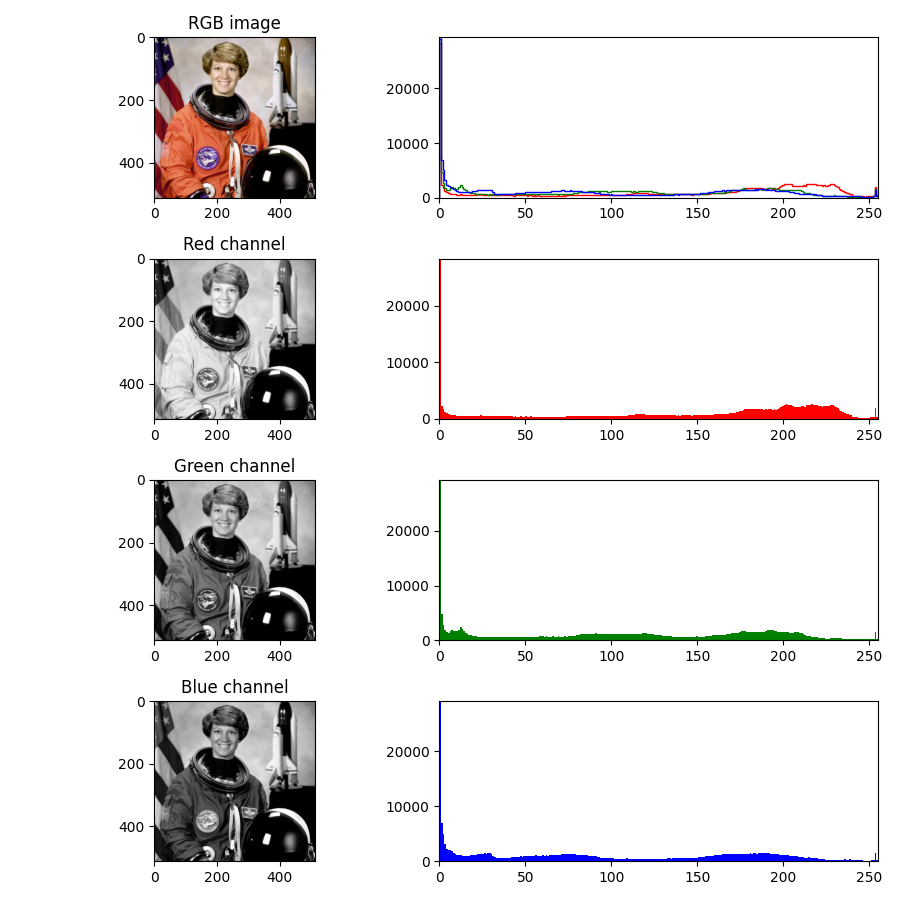

In [15]:
fig, ((ax1, ax5), (ax2, ax6), (ax3, ax7), (ax4, ax8)) = plt.subplots(4, 2, figsize=(9,9))

# Images
ax1.imshow(img_rgb)
ax1.set_title('RGB image')

ax2.imshow(im_r, cmap='gray')
ax2.set_title('Red channel')

ax3.imshow(im_g, cmap='gray')
ax3.set_title('Green channel')

ax4.imshow(im_b, cmap='gray')
ax4.set_title('Blue channel')

# Histograms
ax5.hist(im_r.flatten(), 256, color='red', histtype='step')
ax5.hist(im_g.flatten(), 256, color='green', histtype='step')
ax5.hist(im_b.flatten(), 256, color='blue', histtype='step')
ax5.autoscale(enable=True, axis='both', tight=True)

ax6.hist(im_r.flatten(), 256, color='red')
ax6.autoscale(enable=True, axis='both', tight=True)

ax7.hist(im_g.flatten(), 256, color='green')
ax7.autoscale(enable=True, axis='both', tight=True)

ax8.hist(im_b.flatten(), 256, color='blue')
ax8.autoscale(enable=True, axis='both', tight=True)

plt.tight_layout()
plt.show()

### Converting an RGB image to an intensity image (gray level)

In [16]:
img_rgb_gray = color.rgb2gray(img_rgb)

* Plotting the image together with the color bar and without axes information.

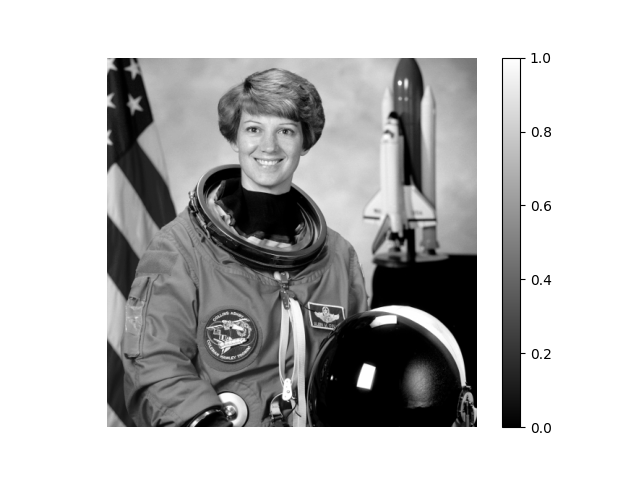

In [17]:
plt.figure()

plt.imshow(img_rgb_gray, cmap='gray')
# Show the color bar
plt.colorbar()
# Do not show axis information
plt.axis('off')

plt.show()

## Loading images from files
---
* In the previous examples, we used images provided by libraries.
* But most of the time, we need to process images stored locally in files.
* Here, we will load an image stored in the file 'daisy04.jpg' in the folder './data/flowers_toy2/daisy/'.

In [18]:
# Using the Scikit-image library (recommended)
img_rgb = io.imread('./data/flowers_toy2/daisy/daisy04.jpg')

In [19]:
print_info(img_rgb)

Shape of the image: (240, 320, 3)
Number of dimensions: 3
Data type: uint8

Minimum value: 0
Maximum value: 255
Image mean: 160.4370
Image standard deviation: 74.6509


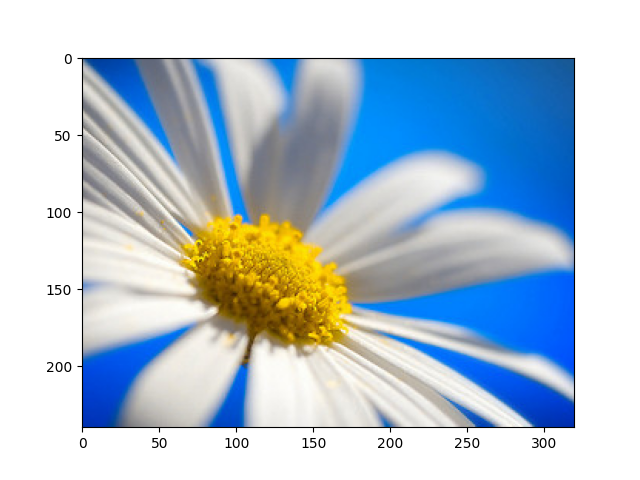

In [20]:
plt.figure()

plt.imshow(img_rgb)

plt.show()

## Saving the images in files
---

In [21]:
# First, lets create a folder to store outputs
if not os.path.exists('output'):
    # If the folder does not exist, then create the folder.
    os.mkdir('output')

In [22]:
# Usando the Scikit-image library
io.imsave('./output/daisy04.png', img_rgb) # Here we saved the file with other extension.

* Check in the folder if the files were created.

## Image data types
---

### Intensity image (or gray-level image)

In [23]:
img_gray = color.rgb2gray(img_rgb)

# Check the current image data type.
print(img_gray.dtype)

float64


* Converting the image to unsigned 8-bit integer (uint8). $2^8$ = 256 values between 0 and 255.

In [24]:
img_gray_uint8 = util.img_as_ubyte(img_gray)
print_info(img_gray_uint8)

Shape of the image: (240, 320)
Number of dimensions: 2
Data type: uint8

Minimum value: 33
Maximum value: 255
Image mean: 157.8232
Image standard deviation: 55.0753


* Converting the image to float. Values between 0.0 and 1.0.

In [25]:
img_gray_float = util.img_as_float(img_gray_uint8)
print_info(img_gray_float)

Shape of the image: (240, 320)
Number of dimensions: 2
Data type: float64

Minimum value: 0.12941176470588234
Maximum value: 1.0
Image mean: 0.6189
Image standard deviation: 0.2160


### RGB image

In [26]:
# Check the current image data type.
print(img_rgb.dtype)

uint8


In [27]:
img_rgb_float = util.img_as_float(img_rgb)
print_info(img_rgb_float)

Shape of the image: (240, 320, 3)
Number of dimensions: 3
Data type: float64

Minimum value: 0.0
Maximum value: 1.0
Image mean: 0.6292
Image standard deviation: 0.2927


In [28]:
img_rgb_uint8 = util.img_as_ubyte(img_rgb_float)
print_info(img_rgb_uint8)

Shape of the image: (240, 320, 3)
Number of dimensions: 3
Data type: uint8

Minimum value: 0
Maximum value: 255
Image mean: 160.4370
Image standard deviation: 74.6509


## Arithmetic operations
---

### Masking

In [29]:
# Information about the input image
print_info(img_gray)

Shape of the image: (240, 320)
Number of dimensions: 2
Data type: float64

Minimum value: 0.1281650980392157
Maximum value: 0.9994345098039217
Image mean: 0.6189
Image standard deviation: 0.2160


In [30]:
# Number of rows
num_l = img_gray.shape[0]

# Number of columns
num_c = img_gray.shape[1]

In [31]:
# Generating a binary mask
img_mask = np.zeros([num_l, num_c], dtype=float)
img_mask[100:200, 50:200] = 1.

In [32]:
# Masking
img_rdi = img_gray * img_mask

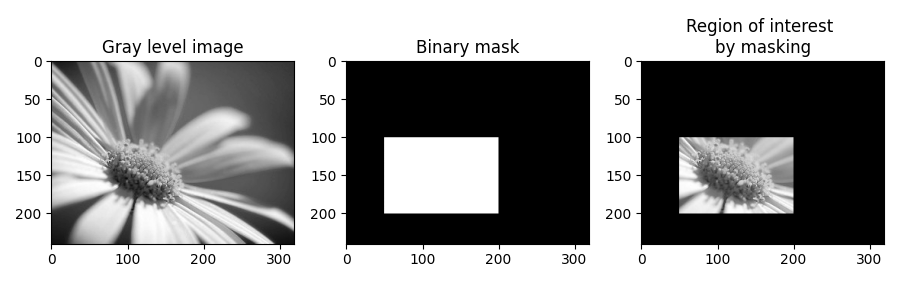

In [33]:
plt.figure(figsize=(9,3))

plt.subplot(1,3,1)
plt.imshow(img_gray, cmap='gray')
plt.title('Gray level image')

plt.subplot(1,3,2)
plt.imshow(img_mask, cmap='gray')
plt.title('Binary mask')

plt.subplot(1,3,3)
plt.imshow(img_rdi, cmap='gray')
plt.title('Region of interest \nby masking')

plt.tight_layout()
plt.show()

## Geometric transformations
---

## Resizing
---

In [34]:
# Check the images shape
print(img_gray.shape)
print(img_rgb.shape)

(240, 320)
(240, 320, 3)


In [35]:
img_gray_res = transform.resize(img_gray, (128, 128), anti_aliasing=True)
print(img_gray_res.shape)

(128, 128)


In [36]:
img_rgb_res = transform.resize(img_rgb, (img_rgb.shape[0]//2, img_rgb.shape[1]//2), anti_aliasing=True)
print(img_rgb_res.shape)

(120, 160, 3)


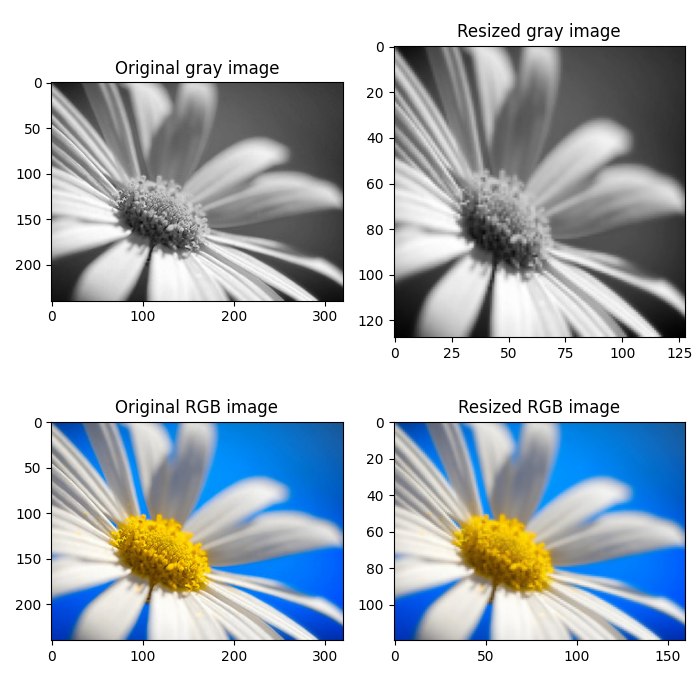

In [37]:
plt.figure(figsize=(7,7))

plt.subplot(2,2,1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original gray image')

plt.subplot(2,2,2)
plt.imshow(img_gray_res, cmap='gray')
plt.title('Resized gray image')

plt.subplot(2,2,3)
plt.imshow(img_rgb,)
plt.title('Original RGB image')

plt.subplot(2,2,4)
plt.imshow(img_rgb_res,)
plt.title('Resized RGB image')

plt.tight_layout()
plt.show()

### Cropping

In [38]:
# Cuts a rectangular region in the image. 
# Rows between 100 and 220 (120 rows) and columns between 50 and 140 (90 columns)
img_crop_1 = img_gray[100:220, 50:140]

In [39]:
print(img_crop_1.shape)

(120, 90)


In [40]:
# Crop the upper right quadrant of the image (regardless of image size)

# Number of rows
num_l = img_gray.shape[0]
# Number of columns
num_c = img_gray.shape[1]

img_crop_2 = img_gray[0:num_l//2, num_c//2:]

In [41]:
print(img_crop_2.shape)

(120, 160)


In [42]:
# Crops the center region of the image to 1/4 of the original size
img_crop_3 = img_gray[num_l//4:-num_l//4, num_c//4:-num_c//4]

In [43]:
print(img_crop_3.shape)

(120, 160)


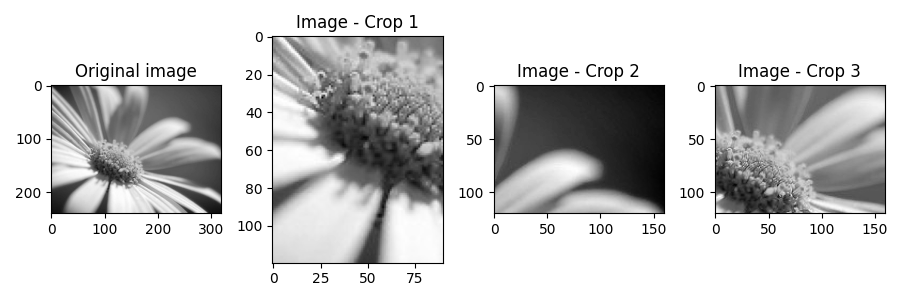

In [44]:
plt.figure(figsize=(9, 3))

plt.subplot(1,4,1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original image')

plt.subplot(1,4,2)
plt.imshow(img_crop_1, cmap='gray')
plt.title('Image - Crop 1')

plt.subplot(1,4,3)
plt.imshow(img_crop_2, cmap='gray')
plt.title('Image - Crop 2')

plt.subplot(1,4,4)
plt.imshow(img_crop_3, cmap='gray')
plt.title('Image - Crop 3')

plt.tight_layout()
plt.show()

### Assigning values using slicing¶

In [45]:
# Number of rows
num_l = img_gray.shape[0]
# Number of columns
num_c = img_gray.shape[1]

# Assigning 1
im_atr = img_gray.copy() # Force copy the image
### im_atr[100:200, num_c//2:] = 255
im_atr[100:200, num_c//2:] = 1.

# Assigning 2
im_atr2 = img_gray.copy() # Force copy the image
im_atr2[100:200, num_c-255:num_c] = np.arange(255)

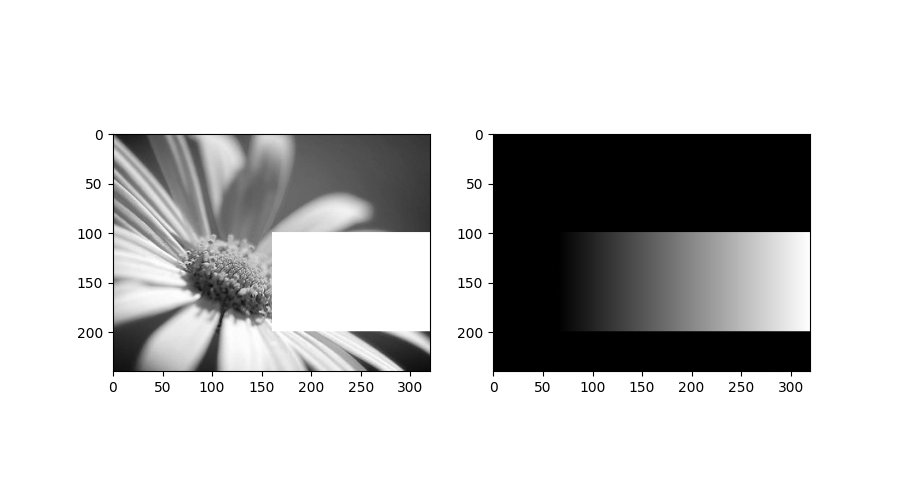

In [46]:
plt.figure(figsize=(9,5))

plt.subplot(1,2,1)
plt.imshow(im_atr, cmap='gray')

plt.subplot(1,2,2)
plt.imshow(im_atr2, cmap='gray')

plt.show()

### Mirroring

In [47]:
# Vertical mirroring
img_esp_v = np.flipud(img_gray)

# Horizontal mirroring
img_esp_h = np.fliplr(img_gray)

# Vertical mirroring followed by horizontal
img_esp_vh = np.fliplr(img_esp_v)

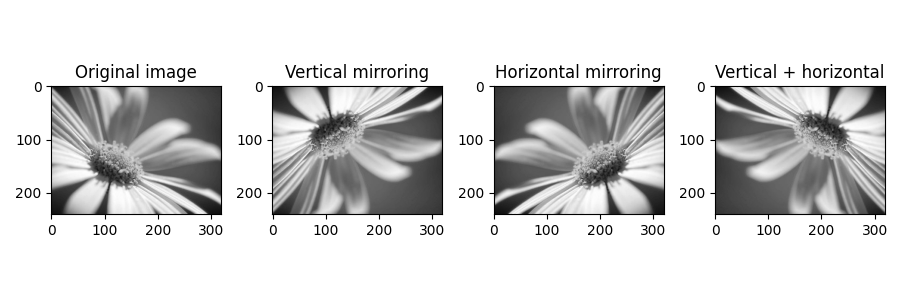

In [48]:
plt.figure(figsize=(9, 3))

plt.subplot(1,4,1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original image')

plt.subplot(1,4,2)
plt.imshow(img_esp_v, cmap='gray')
plt.title('Vertical mirroring')

plt.subplot(1,4,3)
plt.imshow(img_esp_h, cmap='gray')
plt.title('Horizontal mirroring')

plt.subplot(1,4,4)
plt.imshow(img_esp_vh, cmap='gray')
plt.title('Vertical + horizontal')

plt.tight_layout()
plt.show()

### Rotation

* Image rotated 45&deg;.

In [49]:
img_rot_45 = transform.rotate(img_gray, 45)
print_info(img_rot_45)

Shape of the image: (240, 320)
Number of dimensions: 2
Data type: float64

Minimum value: 0.0
Maximum value: 0.9974720362940095
Image mean: 0.5236
Image standard deviation: 0.3125


* Image rotated 45 45&deg;.
    * The image is resized to accommodate the rotated image.

In [50]:
img_rot_45r = transform.rotate(img_gray, 45, resize=True)
print_info(img_rot_45r)

Shape of the image: (396, 396)
Number of dimensions: 2
Data type: float64

Minimum value: 0.0
Maximum value: 0.9981887717081989
Image mean: 0.3029
Image standard deviation: 0.3435


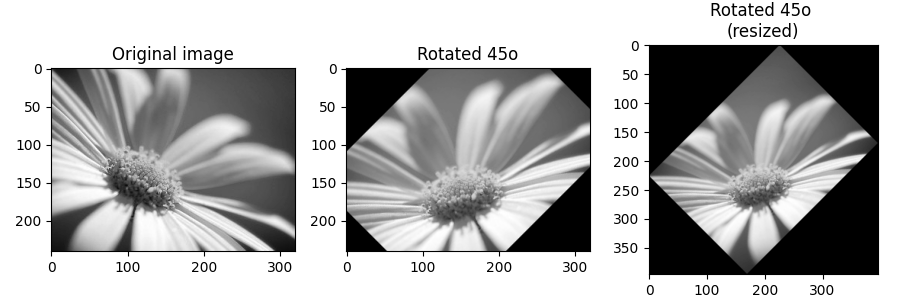

In [51]:
plt.figure(figsize=(9, 3))

plt.subplot(1,3,1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original image')

plt.subplot(1,3,2)
plt.imshow(img_rot_45, cmap='gray')
plt.title('Rotated 45o')

plt.subplot(1,3,3)
plt.imshow(img_rot_45r, cmap='gray')
plt.title('Rotated 45o \n(resized)')

plt.tight_layout()
plt.show()

##  Loading and processing a batch of images
---
* A simple way to process batches of images stored in a folder.
     * Note: The 'glob' module provides more advanced features for this type of task.

In [52]:
path_to_folder = './data/flowers_toy2/daisy/'

# List of all files (and sub-folders) within the folder.
file_list_ = os.listdir(path_to_folder)
print(file_list_)

['daisy00.jpg', 'daisy01.jpg', 'daisy02.jpg', 'daisy03.jpg', 'daisy04.jpg', 'daisy05.jpg']


In [53]:
# Filtering only image files (.jpg, .jpeg, .png)
ext_list = ['jpg', 'jpeg', 'png']

file_list = []
for filename in file_list_:
    # Ignore subfolders and non-image files (.jpg, .jpeg, .png)
    if os.path.isfile(os.path.join(path_to_folder, filename)) and filename.split('.')[-1] in ext_list:
        file_list.append(filename)

print(file_list)

['daisy00.jpg', 'daisy01.jpg', 'daisy02.jpg', 'daisy03.jpg', 'daisy04.jpg', 'daisy05.jpg']


In [54]:
dest_path = './output/processed_images'

if not os.path.exists(dest_path):
    # If the folder does not exist, then create the design folder.
    os.mkdir(dest_path)

In [55]:
# Iterate along the list of elements
for filename in file_list:
    # Load the image...
    img = io.imread(os.path.join(path_to_folder, filename))
    
    # Perform some processing...
    # Here, we cut the center of the image!
    img_proc = img[img.shape[0]//3:-img.shape[0]//3, img.shape[1]//3:-img.shape[1]//3]
    
    # Save the image in the folder...
    io.imsave(os.path.join(dest_path, filename), img_proc)

### Generating a mosaic with the images

6 images


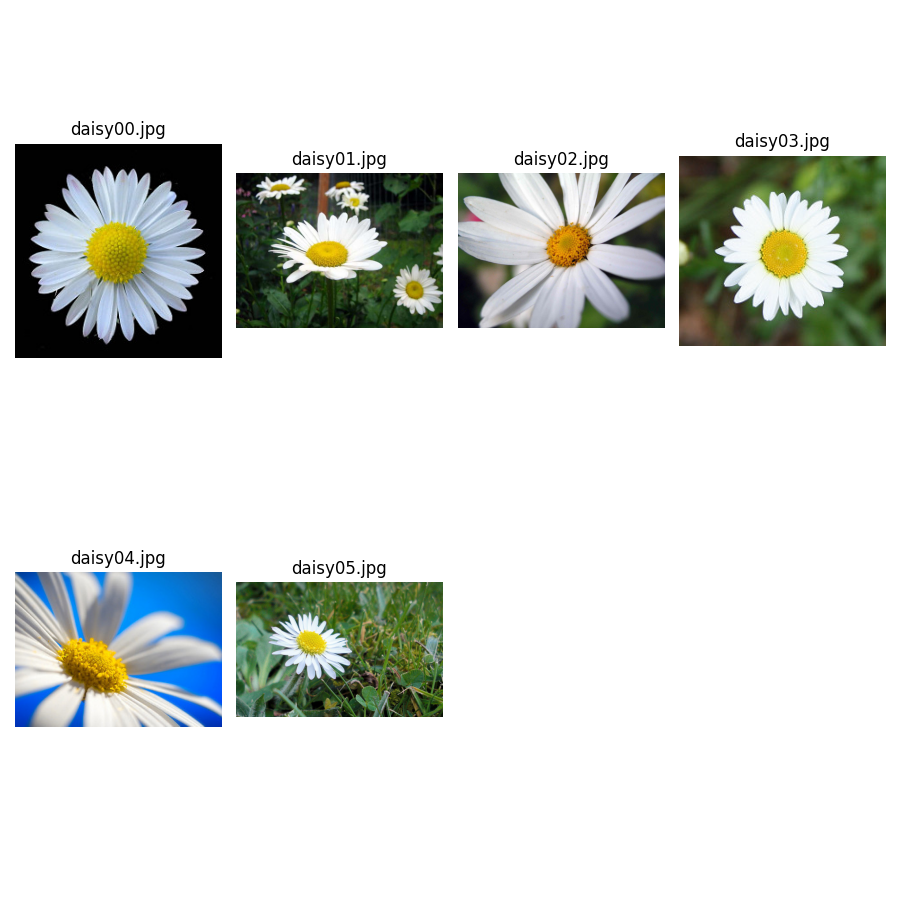

In [56]:
# Number of images in the folder.
num_images = len(file_list)
print(f'{num_images} images')

# Mosaic with 4 columns e ceil(N/4) rows
fig, ax  = plt.subplots(int(np.ceil(num_images/4)), 4, figsize=(9, 9))
for i, filename in enumerate(file_list):

    # Load the image
    img = plt.imread(os.path.join(path_to_folder, filename))
    
    ax[i//4, i%4].imshow(img, cmap='gray')
    ax[i//4, i%4].set_title(str(filename))
    ax[i//4, i%4].axis('off')

for ax in ax.flat[i+1:]:
    ax.remove()

fig.tight_layout()
plt.show()

## Saving information in text files
---

* Frequently, we need to store information about our experiments efficiently.
* Dropping information in text files is fast, easy, and efficient.

In [57]:
# Creating a new text file for writing ('w')
with open('./output/info.txt', "w") as file:
    file.write(f'IMAGES INFO:')

# Iterate along a list of images in a path
for i, filename in enumerate(file_list):
    # Load the image
    img = plt.imread(os.path.join(path_to_folder, filename))

    # Store information about the image in a text file. 'a' is for append
    with open('./output/info.txt', "a") as file:
        file.write(f'\n\nFile name: {filename}')
        file.write(f'\nShape of the image: {img.shape}')
        file.write(f'\nNumber of dimensions: {img.ndim}')
        file.write(f'\nData type: {img.dtype}')
        file.write(f'\nMinimum value: {img.min()}')
        file.write(f'\nMaximum value: {img.max()}')
        file.write(f'\nImage mean: {img.mean():.4f}')
        file.write(f'\nImage standard deviation: {img.std():.4f}')

### Reading the text file

In [58]:
f = open('./output/info.txt', "r")

print(f.read())

IMAGES INFO:

File name: daisy00.jpg
Shape of the image: (240, 231, 3)
Number of dimensions: 3
Data type: uint8
Minimum value: 0
Maximum value: 255
Image mean: 85.0251
Image standard deviation: 94.7974

File name: daisy01.jpg
Shape of the image: (375, 500, 3)
Number of dimensions: 3
Data type: uint8
Minimum value: 0
Maximum value: 255
Image mean: 81.9289
Image standard deviation: 80.7622

File name: daisy02.jpg
Shape of the image: (375, 500, 3)
Number of dimensions: 3
Data type: uint8
Minimum value: 0
Maximum value: 255
Image mean: 152.1850
Image standard deviation: 78.4108

File name: daisy03.jpg
Shape of the image: (221, 240, 3)
Number of dimensions: 3
Data type: uint8
Minimum value: 0
Maximum value: 255
Image mean: 109.9992
Image standard deviation: 80.3588

File name: daisy04.jpg
Shape of the image: (240, 320, 3)
Number of dimensions: 3
Data type: uint8
Minimum value: 0
Maximum value: 255
Image mean: 160.4370
Image standard deviation: 74.6509

File name: daisy05.jpg
Shape of the im

### Saving information in CSV files
---

* A CSV (comma-separated values) file provides an easy and efficient way to store information as a spreadsheet.
* Values in the same line, separated by a comma, are stored in different columns.
* One can choose other separators, such as semicolons ';' and tabulations '\t'.
* We can load CSV files in spreadsheet software such as Microsoft Excel, LibreOffice Calc, Google Sheets, and others.

In [59]:
with open('./output/info.csv', "w") as file:
    file.write(f'IMAGES INFO:')
    
for i, filename in enumerate(file_list):

    # Load the image
    img = plt.imread(os.path.join(path_to_folder, filename))
    
    with open('./output/info.csv', "a") as file:
        file.write(f'\n\nFile name ; {filename}')
        file.write(f'\nShape of the image ; {img.shape}')
        file.write(f'\nNumber of dimensions ; {img.ndim}')
        file.write(f'\nData type ; {img.dtype}')
        file.write(f'\nMinimum value ; {img.min()}')
        file.write(f'\nMaximum value ; {img.max()}')
        file.write(f'\nImage mean ; {img.mean():.4f}')
        file.write(f'\nImage standard deviation , {img.std():.4f}')

* Check the CSV file in your file system.

## Bibliography
---

* GONZALEZ, R.C.; WOODS, R.E. Digital Image Processing. 3rd ed. Pearson, 2007.
* MARQUES FILHO, O.; VIEIRA NETO, H. Processamento digital de imagens. Brasport, 1999.
    * (*in Brazilian Portuguese*)
    * Available on the author's website (for personal use only)
    * http://dainf.ct.utfpr.edu.br/~hvieir/pub.html
* J. E. R. Queiroz, H. M. Gomes. Introdução ao Processamento Digital de Imagens. RITA. v. 13, 2006.
    * (*in Brazilian Portuguese*)
    * http://www.dsc.ufcg.edu.br/~hmg/disciplinas/graduacao/vc-2016.2/Rita-Tutorial-PDI.pdf 
* Gaël Varoquaux Emmanuelle Gouillart; Olav Vahtras; Pierre de Buyl (editores). Scipy Lecture Notes. Release 2020.1
    * Disponível em: http://scipy-lectures.org/
* scikit-image. Documentation.
    * https://scikit-image.org/docs/dev/index.html
* NumPy. Documentation.
    * https://numpy.org/doc/stable/